# Team 5 - Global Terrorism

![](https://www.start.umd.edu/gtd/images/START_GlobalTerrorismDatabase_TerroristAttacksConcentrationIntensityMap_45Years.png)

_For more information about the dataset, read [here](https://www.kaggle.com/START-UMD/gtd)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Use `encoding ='ISO-8859-1'` when reading the .csv file
- There are many columns that are not really helpful for us. Can you identify and drop them?
- Can you draw a map of terrorism event locations?
- And more...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Start your codes here!
terror=pd.read_csv('terrorism.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

C:\Users\DUNG.NT184247\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [3]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [4]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


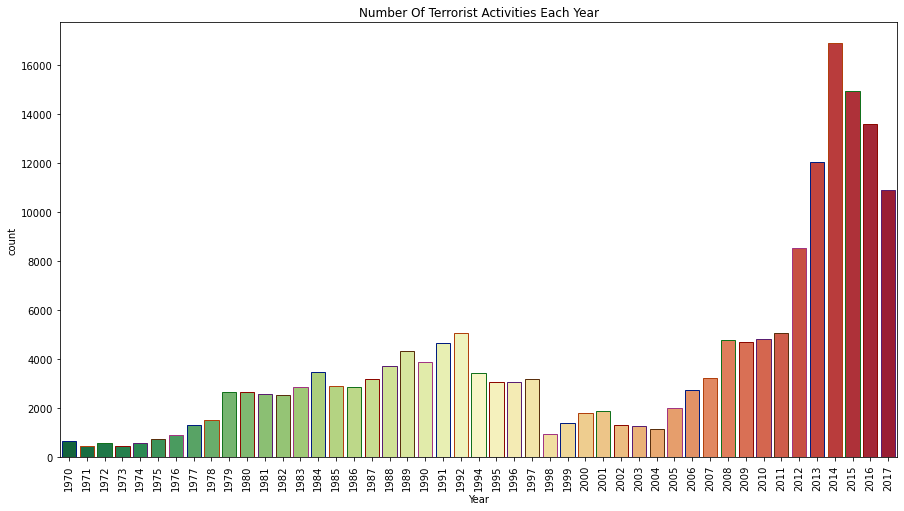

In [8]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

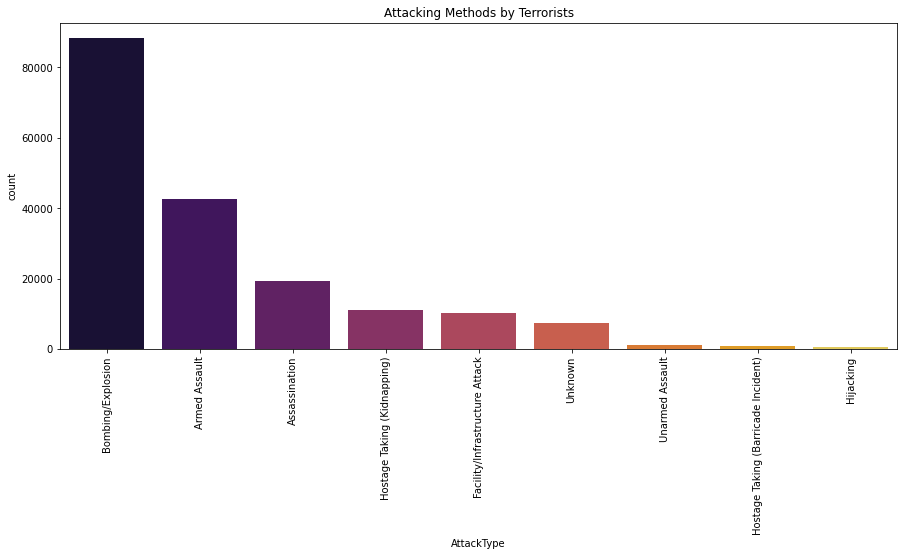

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

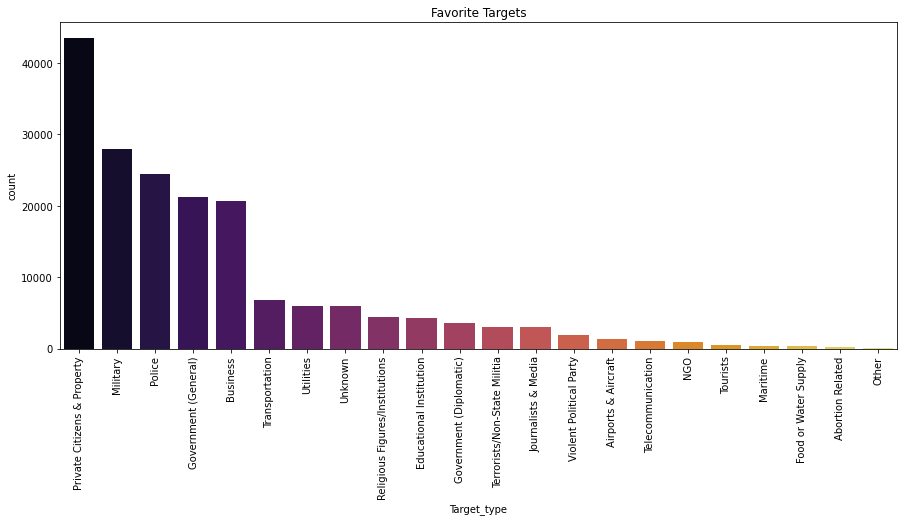

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

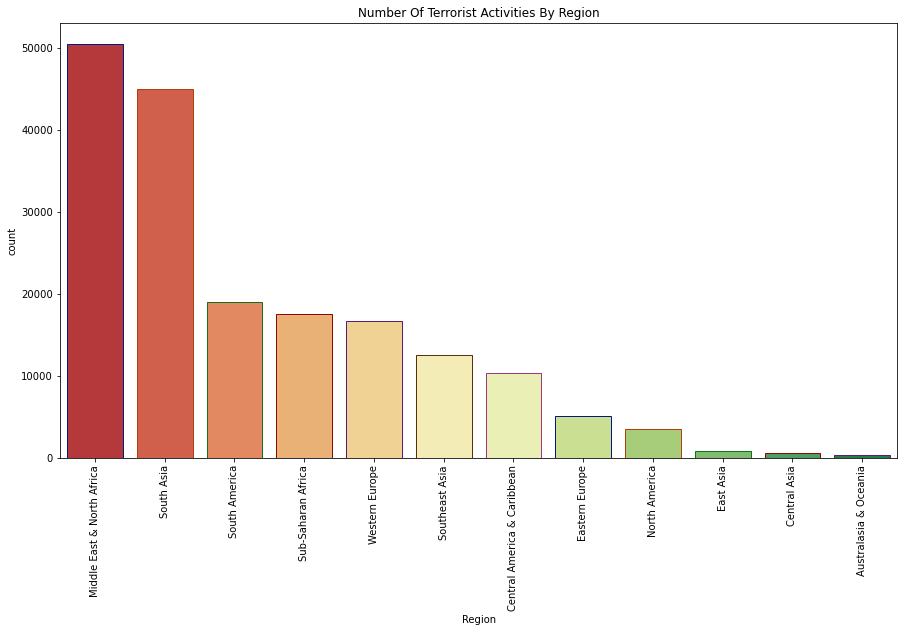

In [12]:
plt.subplots(figsize=(15,8))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

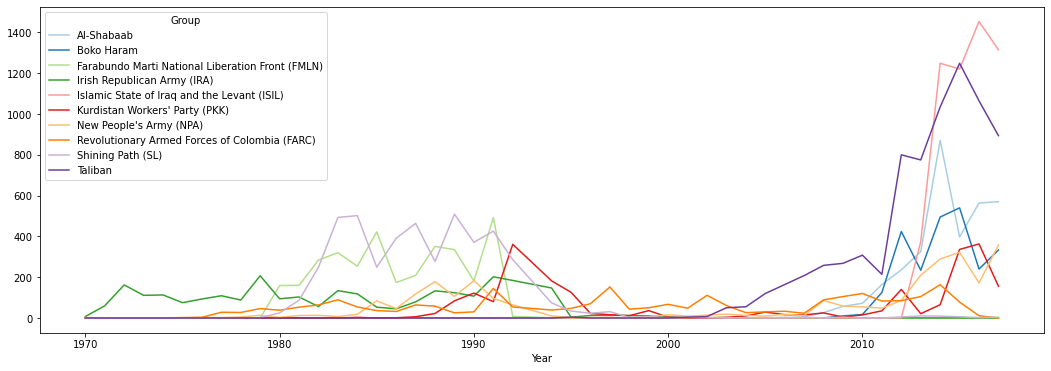

In [13]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()